In [16]:
%matplotlib notebook

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Make a reference to the books.csv file path
csv_path = "Resources/Parkingtickets_Dec2016.csv"

# Import the books.csv file as a DataFrame
tickets_df = pd.read_csv(csv_path, encoding="utf-8")
tickets_df.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
0,GYG8911,NY,PAS,12/18/2016,24,SUBN,JEEP,1204P,Q,NaN,NaN,BK,2015,NaN,15 4,24-No Parking (exc auth veh)
1,8P82H,NY,OMT,12/21/2016,14,TAXI,NISSA,1015A,NY,ALL,ALL,YELLO,2014,-,NaN,NaN
2,GML6346,NY,PAS,12/19/2016,21,SDN,HONDA,1212P,K,1130A,0100A,GREY,2013,-,NaN,NaN
3,12203MG,NY,COM,12/1/2016,46,VAN,FRUEH,1137A,NY,ALL,ALL,BROWN,2015,-,NaN,NaN
4,HEG7444,NY,PAS,12/1/2016,36,4DSD,BMW,1027A,BK,NaN,NaN,BK,2016,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION


In [19]:
#groupby plate type 
plate_gb = tickets_df.groupby("Plate Type")["Violation Code"].nunique()
plate_gb.head()

Plate Type
999    16
AMB     1
APP     4
AYG     1
BOB     1
Name: Violation Code, dtype: int64

# Bar Chart

<IPython.core.display.Javascript object>


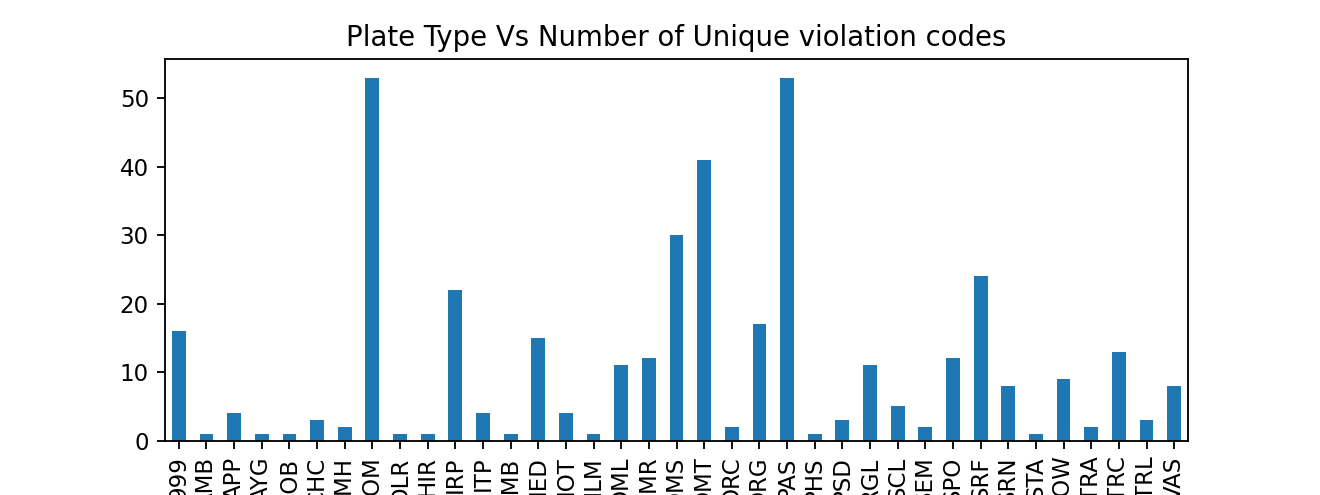

Text(0.5, 1.0, 'Plate Type Vs Number of Unique violation codes')

In [20]:
#Bar plot for Each plate type Vs Unique violation code count
plate_gb.plot(kind="bar", figsize=(8,3))

#title
plt.title("Plate Type Vs Number of Unique violation codes")
# plt.savefig("../Images/plte_types_Vs_violaton codes.png")


In [21]:
#converting the violation codes(int) into object 
tickets_df["Violation Code"] = tickets_df["Violation Code"].apply(str)
tickets_df.dtypes

Plate ID                 object
Registration State       object
Plate Type               object
Issue Date               object
Violation Code           object
Vehicle Body Type        object
Vehicle Make             object
Violation Time           object
Violation County         object
From Hours In Effect     object
To Hours In Effect       object
Vehicle Color            object
Vehicle Year              int64
Meter Number             object
Violation Post Code      object
Violation Description    object
dtype: object

# Bar Plots for Individual Plate Types

In [22]:
#get all the data for PAS plate type
pass_data = tickets_df.loc[tickets_df["Plate Type"] == "PAS"]
pass_data.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
0,GYG8911,NY,PAS,12/18/2016,24,SUBN,JEEP,1204P,Q,NaN,NaN,BK,2015,NaN,15 4,24-No Parking (exc auth veh)
2,GML6346,NY,PAS,12/19/2016,21,SDN,HONDA,1212P,K,1130A,0100A,GREY,2013,-,NaN,NaN
4,HEG7444,NY,PAS,12/1/2016,36,4DSD,BMW,1027A,BK,NaN,NaN,BK,2016,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
7,HLF3741,NY,PAS,12/21/2016,38,4DSD,INFIN,0943P,K,0800A,1000P,GY,2016,NaN,U 31,38-Failure to Display Muni Rec
8,HJF2092,NY,PAS,12/3/2016,38,SUBN,BMW,0204P,K,0900A,0700P,BL,2016,NaN,19 3,38-Failure to Display Muni Rec


In [23]:
#picking the top 10 violation codes for PAS plate type.
pas_violation_codes_df = pd.DataFrame(pass_data['Violation Code'].value_counts()).nlargest(10, columns = ['Violation Code'])
pas_violation_codes_df

,Violation Code
36,6349
21,3301
38,2166
7,1431
71,1245
37,1220
20,1039
14,911
40,888
70,691


In [24]:
#Total violation codes for PAS plate type:
counts = pass_data["Violation Code"].value_counts().rename_axis("Violation codes for PAS plate type").reset_index(name="Number of violations")
counts = counts.set_index("Violation codes for PAS plate type")
counts.head()


,Number of violations
Violation codes for PAS plate type,
36,6349
21,3301
38,2166
7,1431
71,1245


<IPython.core.display.Javascript object>


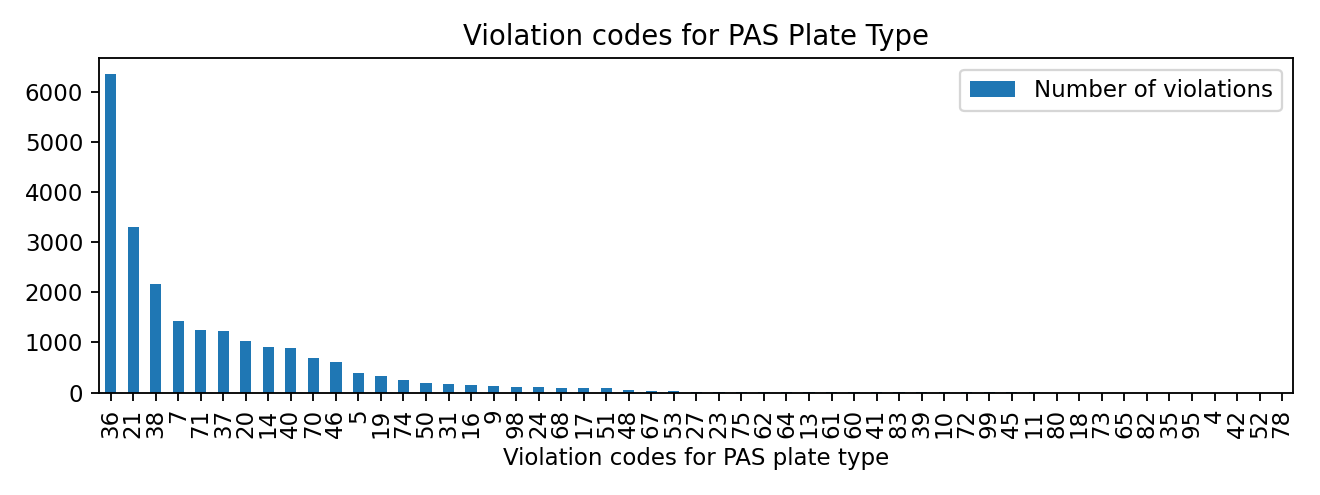

In [25]:
#Bar plot for Violation code Vs corresponding violation code
counts.plot(kind="bar", figsize=(8,3))
plt.title("Violation codes for PAS Plate Type")
plt.show()
plt.tight_layout()

In [26]:
#get all the data for COM plate type
com_data = tickets_df.loc[tickets_df["Plate Type"] == "COM"]
com_data.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
3,12203MG,NY,COM,12/1/2016,46,VAN,FRUEH,1137A,NY,ALL,ALL,BROWN,2015,-,NaN,NaN
5,34719MG,NY,COM,12/8/2016,50,DELV,INTER,0742A,NY,NaN,NaN,BL,2015,NaN,J 99,50-Crosswalk
14,91028MJ,NY,COM,12/13/2016,14,DELV,FRUEH,1012A,NY,0700A,0700P,WHITE,2017,NaN,22 7,14-No Standing
15,59654MG,NY,COM,12/21/2016,36,VAN,FORD,0921A,BK,NaN,NaN,BK,2015,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
16,68218MG,NY,COM,12/13/2016,47,VAN,NS/OT,1039A,NY,0700A,0700P,BLACK,2015,NaN,14 6,47-Double PKG-Midtown


In [27]:
#Picking the top 10 violation codesor most ticketed codes for COM plate type:
com_violation_codes_df = pd.DataFrame(com_data['Violation Code'].value_counts()).nlargest(10, columns = ['Violation Code'])
com_violation_codes_df

,Violation Code
14,605
46,480
38,439
37,282
36,230
69,217
21,216
16,196
19,189
47,136


In [29]:
#Total violation codes for COM plate type:
com_counts = com_data["Violation Code"].value_counts().rename_axis("Violation codes for COM plate type").reset_index(name="Number of violations")
com_counts = com_counts.set_index("Violation codes for COM plate type")
com_counts.head()

,Number of violations
Violation codes for COM plate type,
14,605
46,480
38,439
37,282
36,230


<IPython.core.display.Javascript object>


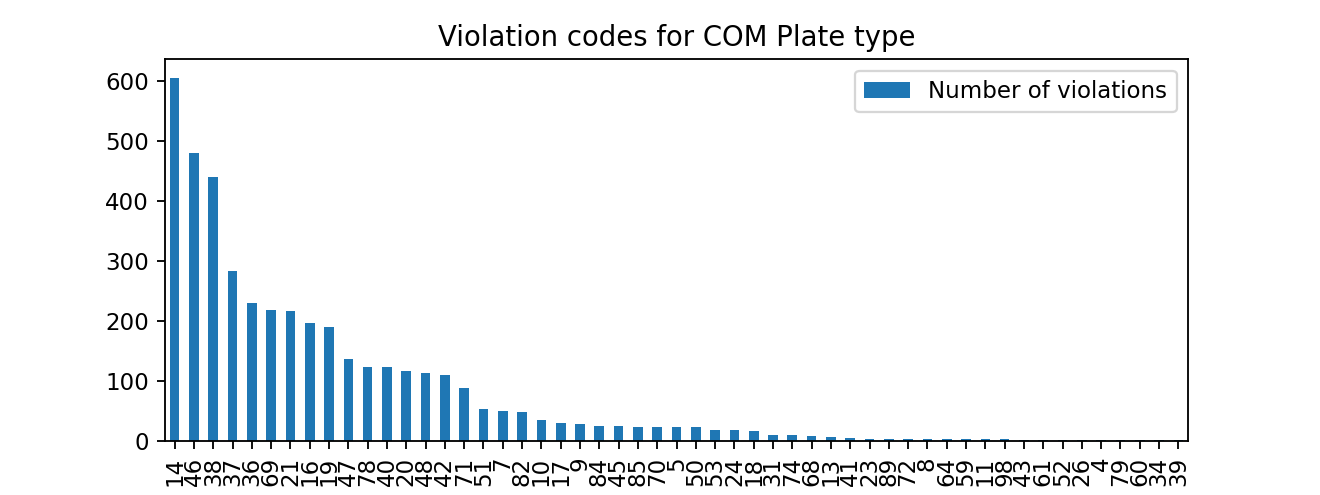

In [32]:
#Bar Plot for COM plate type Vs total number of unique violation codes
com_counts.plot(kind="bar", figsize=(8,3))
plt.title("Violation codes for COM Plate type")
plt.show()

In [126]:
#get all the data for OMT
omt_data = tickets_df.loc[tickets_df["Plate Type"] == "OMT"]
omt_data.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
1,8P82H,NY,OMT,12/21/2016,14,TAXI,NISSA,1015A,NY,ALL,ALL,YELLO,2014,-,NaN,NaN
35,T668755C,NY,OMT,12/14/2016,7,4DSD,HONDA,1156P,MN,NaN,NaN,BK,2014,NaN,NaN,FAILURE TO STOP AT RED LIGHT
45,T700191C,NY,OMT,12/16/2016,89,SUBN,GMC,1045A,K,ALL,ALL,BLACK,2015,-,NaN,NaN
46,T711289C,NY,OMT,12/10/2016,40,SUBN,TOYOT,0221A,Q,NaN,NaN,BK,2016,NaN,C 42,40-Fire Hydrant
47,T685816C,NY,OMT,12/27/2016,21,4DSD,TOYOT,1139A,Q,1130A,0100P,BK,2015,NaN,30 4,21-No Parking (street clean)


In [127]:
#top 10 violation codes for OMT plate type
omt_violation_codes_df = pd.DataFrame(omt_data['Violation Code'].value_counts()).nlargest(10, columns = ['Violation Code'])
omt_violation_codes_df

,Violation Code
36,572
21,360
7,284
14,164
38,149
9,147
5,132
20,126
40,118
46,113


In [129]:
#Total Violation codes and corresponding number of violations for OMT plate type:
omt_counts = omt_data["Violation Code"].value_counts().rename_axis("Violation codes for OMT plate type").reset_index(name="Number of violations")
omt_counts = omt_counts.set_index("Violation codes for OMT plate type")
omt_counts.head()

,Number of violations
Violation codes for OMT plate type,
36,572
21,360
7,284
14,164
38,149


<IPython.core.display.Javascript object>


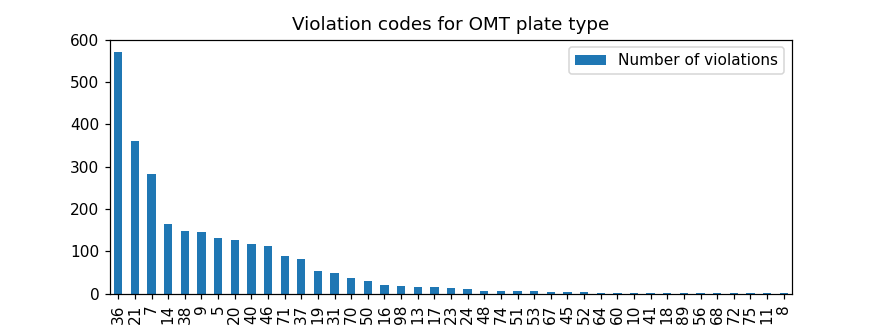

In [130]:
#BAR plot for OMT plate type and violation codes:
omt_counts.plot(kind="bar", figsize=(8,3))
plt.title("Violation codes for OMT plate type")
plt.show()

In [131]:
#get all the data for OMS plate type:
oms_data = tickets_df.loc[tickets_df["Plate Type"] == "OMS"]
oms_data.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
90,GXP3410,NY,OMS,12/13/2016,38,SUBN,DODGE,0210P,Q,0800A,0700P,GY,2016,NaN,20 4,38-Failure to Display Muni Rec
124,HFX1696,NY,OMS,12/7/2016,38,SUBN,DODGE,0926A,K,0900A,0700P,BK,2016,NaN,05 3,38-Failure to Display Muni Rec
171,HKE6426,NY,OMS,12/16/2016,36,SUBN,CHRYS,1045A,QN,NaN,NaN,BK,2017,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
232,GTV4799,NY,OMS,12/8/2016,48,SUBN,BMW,0330P,K,NaN,NaN,BL,2017,NaN,09 3,48-Bike Lane
362,HJD5994,NY,OMS,12/23/2016,36,4DSD,CHEVR,1107A,BK,NaN,NaN,WH,2016,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION


In [138]:
#Top 10 violation codes for OMS plate type:
oms_violation_codes_df = pd.DataFrame(oms_data['Violation Code'].value_counts()).nlargest(10, columns = ['Violation Code'])
oms_violation_codes_df

,Violation Code
36,171
21,115
38,67
7,48
14,37
40,35
37,35
20,34
71,21
46,19


In [141]:
#Total violation codes  and number of violations for OMS plate type
oms_counts = oms_data["Violation Code"].value_counts().rename_axis("Violation codes for OMS plate type").reset_index(name="Number of violations")
oms_counts = oms_counts.set_index("Violation codes for OMS plate type")
oms_counts.head()

,Number of violations
Violation codes for OMS plate type,
36,171
21,115
38,67
7,48
14,37


<IPython.core.display.Javascript object>


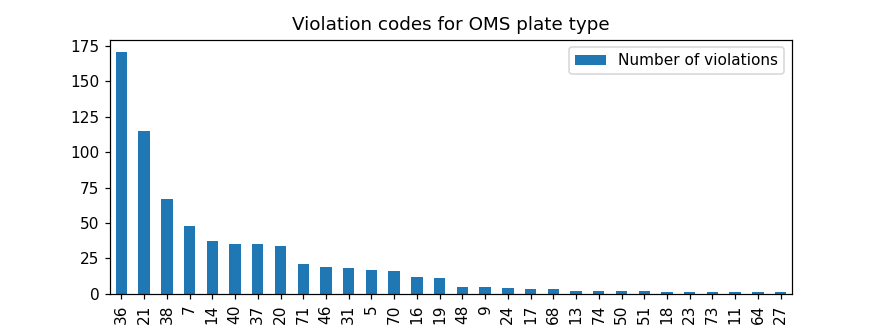

In [142]:
#bar plot for OMS plate type (Violation codes Vs corresponding number of violations)
oms_counts.plot(kind= "bar", figsize=(8,3))
plt.title("Violation codes for OMS plate type")
plt.show()

In [34]:
#get all the data for SRF plate type
srf_data = tickets_df.loc[tickets_df["Plate Type"] == "SRF"]
srf_data.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
6,100VM,NY,SRF,12/7/2016,20,SUBN,JEEP,0440P,NY,0800A,0600P,WHITE,2013,NaN,01B,20A-No Parking (Non-COM)
42,EZRUNER1,NY,SRF,12/29/2016,21,PICK,NS/OT,1107A,NY,1100A,1230A,BLACK,2014,NaN,47 7,21-No Parking (street clean)
82,JAZZFUSE,NY,SRF,12/9/2016,21,SUBN,MAZDA,0946A,BX,0930A,1100A,GY,2016,NaN,B 21,21-No Parking (street clean)
197,R1CECAKE,NY,SRF,12/6/2016,21,SUBN,JEEP,0937A,K,0930A,1100A,WH,2013,-,NaN,NaN
206,BHNYLAW,NY,SRF,12/24/2016,38,4DSD,LEXUS,1035A,K,0900A,0700P,GREY,2015,NaN,41 3,38-Failure to Display Muni Rec


In [35]:
#Top 10 violation codes for SRF plate type
srf_violation_codes_df = pd.DataFrame(srf_data['Violation Code'].value_counts()).nlargest(10, columns = ['Violation Code'])
srf_violation_codes_df

,Violation Code
36,107
38,40
21,38
7,23
37,20
20,18
71,16
40,16
70,15
14,11


In [36]:
#total violation codes for srf plate type
srf_counts = srf_data["Violation Code"].value_counts().rename_axis("Violation codes for SRF plate type").reset_index(name="Number of violations")
srf_counts = srf_counts.set_index("Violation codes for SRF plate type")
srf_counts.head()

,Number of violations
Violation codes for SRF plate type,
36,107
38,40
21,38
7,23
37,20


<IPython.core.display.Javascript object>


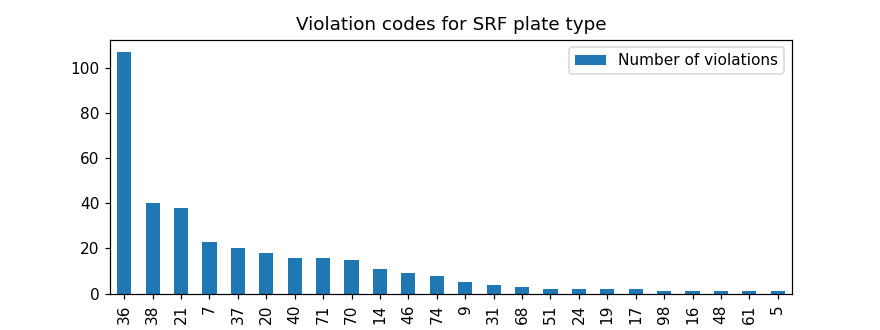

In [147]:
#Bar plot for SRF plate type and violation codes.
srf_counts.plot(kind="bar", figsize=(8,3))
plt.title("Violation codes for SRF plate type")
plt.show()